In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,5)

In [21]:
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.express as px

In [2]:
df = pd.read_csv("covid_19_india.csv")

In [10]:
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       18110 non-null  int64         
 1   Date                      18110 non-null  datetime64[ns]
 2   Time                      18110 non-null  object        
 3   State/UnionTerritory      18110 non-null  object        
 4   ConfirmedIndianNational   18110 non-null  object        
 5   ConfirmedForeignNational  18110 non-null  object        
 6   Cured                     18110 non-null  int64         
 7   Deaths                    18110 non-null  int64         
 8   Confirmed                 18110 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.2+ MB


In [13]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [14]:
# Changing the data type of the date column


df["Date"] = pd.to_datetime(df["Date"])

In [16]:
df["Month"] = df["Date"].apply(lambda x: x.month)

In [17]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Month
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,2
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,2


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Month-wise confirmed cases')

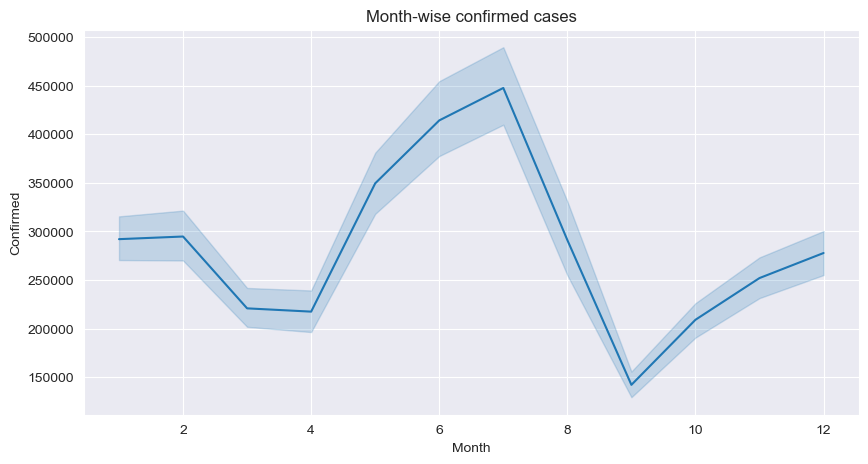

In [49]:
# Month-wise confirmed cases

sns.lineplot(df["Month"],df["Confirmed"])
plt.title("Month-wise confirmed cases")

In [19]:
# Year wise confirmed cases

year_wise = df["Date"].dt.year.value_counts()

In [20]:
year_wise

2020    10082
2021     8028
Name: Date, dtype: int64

In [22]:
year_wise.iplot(kind = "bar")

In [29]:
df["Date_of_month"] = df["Date"].apply(lambda x: x.day)

In [30]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Month,Date_of_month
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,1,30
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1,31
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2,1
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,2,2
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,2,3


Text(0.5, 1.0, 'Day-wise Confirmed Cases')

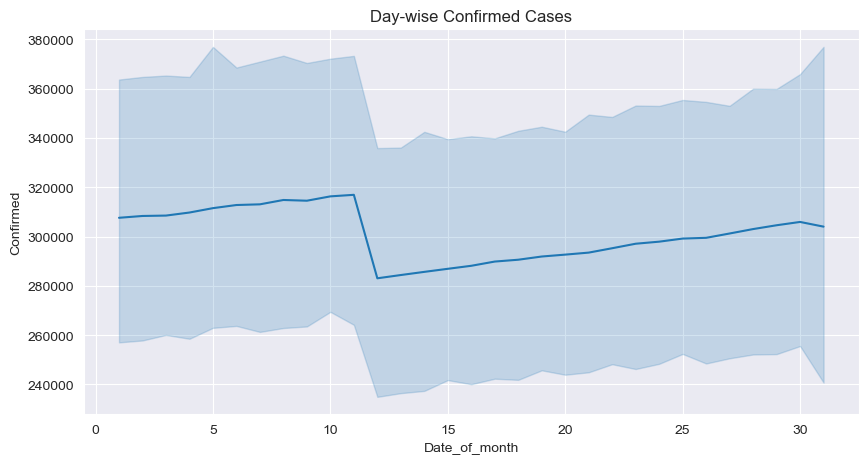

In [48]:
# Day-wise confirmed cases

sns.lineplot(x = df["Date_of_month"], y = df["Confirmed"])
plt.title("Day-wise Confirmed Cases")

In [32]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Month,Date_of_month
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,1,30
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1,31
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2,1
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,2,2
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,2,3


In [37]:
# Top 5 most effected states

states = df["State/UnionTerritory"].value_counts().sort_values(ascending = False).head(5)

In [38]:
states

Kerala           560
Delhi            528
Rajasthan        527
Uttar Pradesh    526
Haryana          526
Name: State/UnionTerritory, dtype: int64

In [41]:
states.iplot("bar")

In [44]:
# State-wise deaths

deaths = df.groupby("State/UnionTerritory")["Deaths"].sum().sort_values(ascending = False).head(10)

Text(0.5, 1.0, 'State-wise Deaths')

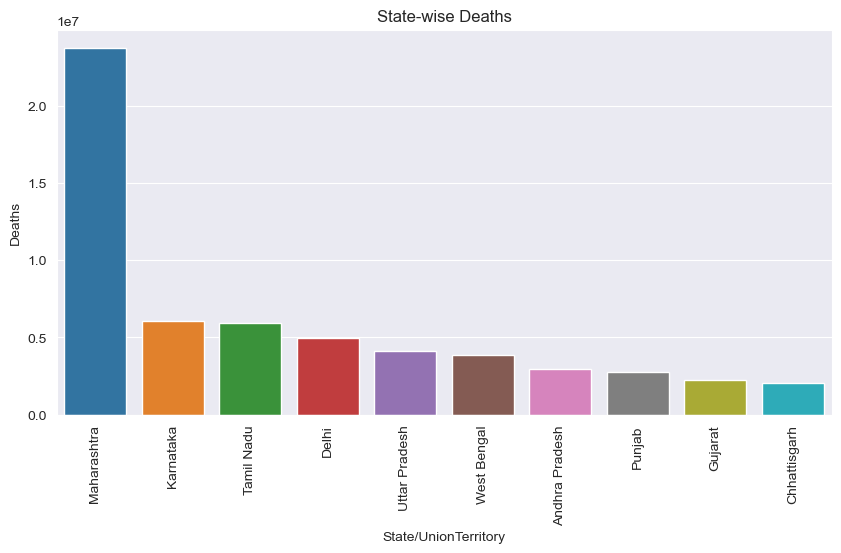

In [47]:
sns.barplot(x = deaths.index, y = deaths.values)
plt.xticks(rotation = 90)
plt.ylabel("Deaths")
plt.title("State-wise Deaths")

In [50]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Month,Date_of_month
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,1,30
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1,31
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2,1
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,2,2
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,2,3


Text(0.5, 1.0, 'Month-wise Cures Cases')

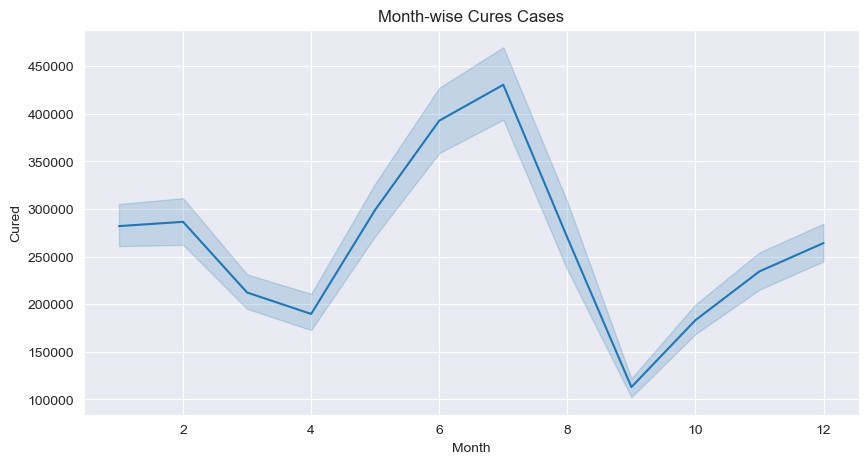

In [54]:
# Month-wise cured cases

sns.lineplot(x = df["Month"], y = df["Cured"])
plt.title("Month-wise Cures Cases")

In [55]:
# States with deaths more that the average deaths

avg_deaths = df["Deaths"].mean()

In [57]:
df[df["Deaths"] > avg_deaths]["State/UnionTerritory"].unique()

array(['Maharashtra', 'Tamil Nadu', 'Delhi', 'Karnataka',
       'Andhra Pradesh', 'Uttar Pradesh', 'West Bengal', 'Punjab',
       'Gujarat', 'Kerala', 'Chhattisgarh', 'Madhya Pradesh', 'Haryana',
       'Rajasthan', 'Jharkhand', 'Uttarakhand', 'Bihar',
       'Jammu and Kashmir', 'Bihar****', 'Assam', 'Odisha',
       'Madhya Pradesh***', 'Karanataka', 'Maharashtra***'], dtype=object)

In [61]:
# Foreign nationals who were infected in India

foreign = df.groupby("State/UnionTerritory")["ConfirmedForeignNational"].count().sort_values(ascending = False).head(10)

<AxesSubplot:xlabel='State/UnionTerritory'>

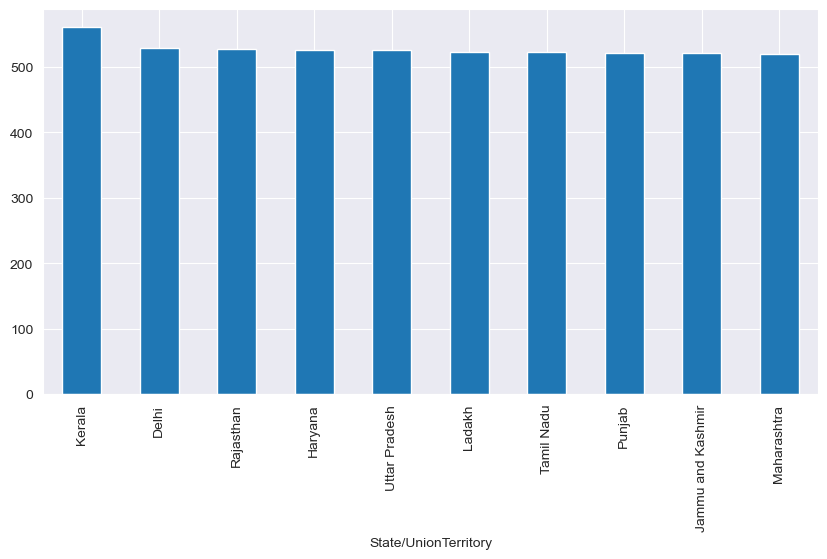

In [62]:
foreign.plot(kind = "bar")